In [1]:
%%html
<style>
table {float: left}
</style>

# Semesterarbeit Statistische Datenanalyse

## Dokumenteninformationen


| Titel   <img width=200/> |      todo     |
|:---------|:------------- |
| Schule |  Fernfachhochschule Schweiz |
| Studiengang |    Certificate of Advanced Studies in Statistische Datenanalyse & Datenvisualisierung   |
| Kennung | DS-C-SD001.StatDa.ZH-Sa-1.PVA.FS23 |
| Semester | Frühlingssemester 2023 |
| Dozent | **Jörg Osterrieder**<br>joerg.osterrieder@ffhs.ch<br> |
| Autor | **Patrick Hirschi**<br>Geburtsdatum: 12.01.1990<br>Matrikelnummer: 10-179-026<br>Studierenden-ID: 200768<br>patrick-hirschi@gmx.ch<br> |

# Einleitung

Die vorliegende Semesterarbeit hat zum Ziel, auf einem ausgewählten Datenset verschiedene statistische Methoden/Verfahren zu testen, zu interpetieren und zu beurteilen. 

# Datenbeschaffung

## Datenset finden

Um böse Überraschungen im Projektverlauf zu vermeiden, wurde an dieser Stelle darauf verzichtet, ein Datenset aus dem eigenen geschäftlichen Umfeld anzufragen. Die Zeit zwischen Semesterstart und Abgabe der Arbeiten ist dafür leider jeweils sehr knapp bemessen.
  
[Kaggle](https://www.kaggle.com/) ist eine Online Community für Data Scientisten, mit vielen offenen Datensets, Code-Challenges und Forenbeiträgen. Um ein Datenset herunterzuladen braucht man lediglich einen Account. Dieser ist kostenlos.
  
Für diese Arbeit wurde ein [Datenset](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) von der Weltgesundheitsorganisation (WHO) ausgewählt. Darin sind für 193 Länder weltweit und für den Zeitraum 2000-2015 gesundheitsbezogene Daten wie z.B. die Lebenserwartung, Sterberate für Erwachsene, etc. abgebildet. Das Datenset hat 64'636 Zeilen und 22 Spalten (davon die meisten numerisch). Damit ist es sehr gut geeignet für die verschiedenen statistischen Tests, die im Rahmen dieser Arbeit durchgeführt und evaluiert werden sollen.

## Quelldaten laden

Nach dem Herunterladen der Daten in den lokalen Projektordner, sollen sie zuerst in ein Pandas DataFrame eingelesen werden. Dazu müssen aber die relevanten python Module in Jupyter importiert werden.

### Modulimport

In [2]:
# import required modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sys
import os
import datetime
import requests
from requests.exceptions import HTTPError
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.graphics.gofplots import qqplot
import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go

# Scipy
import scipy as sp
from scipy.stats import shapiro
from scipy.stats import kstest

# print versions
print('matplotlib: %s' % matplotlib.__version__)
print('requests: %s' % requests.__version__)
print('pandas: %s' % pd.__version__)
print('numpy: %s' % np.__version__)
print('scipy: %s' % sp.__version__)
print('sklearn: %s' % sk.__version__)
print('plotly: %s' % plotly.__version__)
print('seaborn: %s' % sns.__version__)
print('statsmodels: %s' % sm.__version__)

# log success
print(f'The module import was successful!')

matplotlib: 3.6.3
requests: 2.28.2
pandas: 1.5.3
numpy: 1.24.2
scipy: 1.10.1
sklearn: 1.2.1
plotly: 5.13.0
seaborn: 0.12.2
statsmodels: 0.13.5
The module import was successful!


### Datenimport

In [3]:
# datetime method for logging purposes
def get_current_time_str():
    return datetime.datetime.now().strftime("%H:%M:%S.%f")

# assign directory
directory = './data/'

# read input data
df_input_data = pd.read_csv(os.path.join(directory, 'life_expectancy_data.csv'))

# log an output message
print(f'{get_current_time_str()}: Successfully loaded input data '
      f'of size: {df_input_data.size}') 

23:10:56.149565: Successfully loaded input data of size: 64636


In [4]:
# print the first 10 rows to check if the import worked
df_input_data.head(10)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   
5             74     0.01               79.679367         66.0      1989  ...   
6             77     0.01               56.762217         63.0      2861  ...   
7             80     0.03               25.873925         64.0      1599  ...   
8             82     0.02               10.910156         63.0      1141  ...   
9             84     0.03               17.171518         64.0      1990  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   
5   66.0               9.20         66.0        0.1  553.328940   2883167.0   
6   63.0               9.42         63.0        0.1  445.893298    284331.0   
7   64.0               8.33         64.0        0.1  373.361116   2729431.0   
8   63.0               6.73         63.0        0.1  369.835796  26616792.0   
9   58.0               7.43         58.0        0.1  272.563770   2589345.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   
5                   18.4                 18.4   
6                   18.6                 18.7   
7                   18.8                 18.9   
8                   19.0                 19.1   
9                   19.2                 19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1  

[10 rows x 22 columns]

In [5]:
# check the column types
df_input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
# rename the columns to remove spaces and shorten them
df_input_data.rename(columns={'Country': 'country', 
                              'Year': 'year', 
                              'Status': 'status', 
                              'Life expectancy ': 'life_exp', 
                              'Adult Mortality': 'adlt_mort', 
                              'infant deaths': 'inft_death', 
                              'Alcohol': 'alcohol', 
                              'percentage expenditure': 'perc_exp', 
                              'Hepatitis B': 'hep_b', 
                              'Measles ': 'measles', 
                              ' BMI ': 'bmi', 
                              'under-five deaths ': 'u5_death', 
                              'Polio': 'polio', 
                              'Total expenditure': 'total_exp', 
                              'Diphtheria ': 'dipht', 
                              ' HIV/AIDS': 'hiv', 
                              'GDP': 'gdp', 
                              'Population': 'population', 
                              ' thinness  1-19 years': 'thinness_teenager', 
                              ' thinness 5-9 years': 'thinness_children', 
                              'Income composition of resources': 'incm_comp', 
                              'Schooling': 'schooling'}, 
                     inplace=True)

# check the column names
df_input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2938 non-null   object 
 1   year               2938 non-null   int64  
 2   status             2938 non-null   object 
 3   life_exp           2928 non-null   float64
 4   adlt_mort          2928 non-null   float64
 5   inft_death         2938 non-null   int64  
 6   alcohol            2744 non-null   float64
 7   perc_exp           2938 non-null   float64
 8   hep_b              2385 non-null   float64
 9   measles            2938 non-null   int64  
 10  bmi                2904 non-null   float64
 11  u5_death           2938 non-null   int64  
 12  polio              2919 non-null   float64
 13  total_exp          2712 non-null   float64
 14  dipht              2919 non-null   float64
 15  hiv                2938 non-null   float64
 16  gdp                2490 

Die Spaltenbeschreibungen gibt es auf Kaggle nur in Englisch. Der Vollständigkeit halber wurden sie hier auf deutsch übersetzt und zusammengetragen:
  
| Spaltenname (neu)  | Spaltenname (alt)  | Beschreibung  |
|:---|:---|:---|
| country  | Country  | Land  |
| year  | Year  | Jahr |
| status  | Status  | Entwicklungsstatus - "Developed" (für entwickelte Staaten) oder "Developing" (für Entwicklungsländer) |
| life_exp  | Life expectancy  | Lebenserwartung (Alter in Jahren) |
| adlt_mort  | Adult Mortality  | Erwachsenensterblichkeit (Anzahl Tote auf 1000 Einwohner für die Altersklasse 15 bis 60) |
| inft_death  | infant deaths  | Kindersterblichkeit (Anzahl Tote auf 1000 Einwohner für die Altersklasse 0 bis 15) |
| alcohol  | Alcohol  | Alkohol in Liter pro Kopf und Jahr |
| perc_exp  | percentage expenditure  | Anteil der Gesundheitsausgaben am BIP pro Kopf (in Prozent) |
| hep_b  | Hepatitis B  | Hepatitis B Immunisierung bei 1 Jahr alten Kindern (in Prozent) |
| measles  | Measles  | Anzahl gemeldete Masern-Fälle pro 1000 Einwohner |
| bmi  | BMI  | Durchschnittlicher Body Mass Index |
| u5_death  | under-five deaths  | Anzahl Tote unter 5 Jahren pro 1000 Einwohner |
| polio  | Polio  | Polio Immunisierung bei 1 Jahr alten Kindern (in Prozent) |
| total_exp  | Total expenditure  | Anteil der Gesundheitsausgaben an den Gesamtausgaben (in Prozent) |
| dipht  | Diphtheria  | Diphterie Immunisierung bei 1 Jahr alten Kindern (in Prozent) |
| hiv  | HIV/AIDS  | HIV/AIDS Tote pro 1000 Lebendgeburten (0-4 Jahre)  |
| gdp  | GDP  | BIP pro Kopf (in US Dollar) |
| population  | Population  | Bevölkerungsanzahl |
| thinness_teenager  | thinness  10-19 years  | Prävalenz von Untergewicht bei Kindern und Jugendlichen im Alter von 10 bis 19 Jahren (in %) |
| thinness_children  | thinness 5-9 years  | Prävalenz von Untergewicht bei Kindern und Jugendlichen im Alter von 5 bis 9 Jahren (in %) |
| incm_comp  | Income composition of resources | Index der menschlichen Entwicklung in Bezug auf die Einkommenszusammensetzung der Ressourcen (Index von 0 bis 1) |
| schooling  | Schooling  | Anzahl der Schuljahre pro Kopf |

# Datenanalyse

## Explorative Datenanalyse

Mit der explorativen Datenanalyse sollen die Daten besser verstanden werden können. Es geht um die Anwendung grundlegender statistischer und visueller Analysen. So können Probleme (z.B. fehlende Werte), Verteilungen oder Wertebereiche bereits früh im Projekt erkannt werden.

### Generelle Prüfungen

Die Pandas Info-Methode gibt einen schnellen Überblick über das Dataframe.

In [7]:
# Check data for datatypes, column/row counts, missing elements, etc.
df_input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2938 non-null   object 
 1   year               2938 non-null   int64  
 2   status             2938 non-null   object 
 3   life_exp           2928 non-null   float64
 4   adlt_mort          2928 non-null   float64
 5   inft_death         2938 non-null   int64  
 6   alcohol            2744 non-null   float64
 7   perc_exp           2938 non-null   float64
 8   hep_b              2385 non-null   float64
 9   measles            2938 non-null   int64  
 10  bmi                2904 non-null   float64
 11  u5_death           2938 non-null   int64  
 12  polio              2919 non-null   float64
 13  total_exp          2712 non-null   float64
 14  dipht              2919 non-null   float64
 15  hiv                2938 non-null   float64
 16  gdp                2490 

Es gibt also 22 Spalten und 2938 Zeilen. Alle Spalten sind numerisch, ausser die Spalten Land und Status. Es ist auch ersichtlich, dass es in einigen Spalten fehlende Werte gibt. Um tiefer in einzelne Spalten einzutauchen, können für jede Spalte die Anzahl Werte, Mittelwert, Standardabweichung, der Minimal-/Maximalwert und die Quartile angezeigt werden.

In [8]:
# Check count, mean, std, quartiles, min and max per variable
df_input_data.describe()

year     life_exp    adlt_mort   inft_death      alcohol  \
count  2938.000000  2928.000000  2928.000000  2938.000000  2744.000000   
mean   2007.518720    69.224932   164.796448    30.303948     4.602861   
std       4.613841     9.523867   124.292079   117.926501     4.052413   
min    2000.000000    36.300000     1.000000     0.000000     0.010000   
25%    2004.000000    63.100000    74.000000     0.000000     0.877500   
50%    2008.000000    72.100000   144.000000     3.000000     3.755000   
75%    2012.000000    75.700000   228.000000    22.000000     7.702500   
max    2015.000000    89.000000   723.000000  1800.000000    17.870000   

           perc_exp        hep_b        measles          bmi     u5_death  \
count   2938.000000  2385.000000    2938.000000  2904.000000  2938.000000   
mean     738.251295    80.940461    2419.592240    38.321247    42.035739   
std     1987.914858    25.070016   11467.272489    20.044034   160.445548   
min        0.000000     1.000000       0.000000     1.000000     0.000000   
25%        4.685343    77.000000       0.000000    19.300000     0.000000   
50%       64.912906    92.000000      17.000000    43.500000     4.000000   
75%      441.534144    97.000000     360.250000    56.200000    28.000000   
max    19479.911610    99.000000  212183.000000    87.300000  2500.000000   

             polio   total_exp        dipht          hiv            gdp  \
count  2919.000000  2712.00000  2919.000000  2938.000000    2490.000000   
mean     82.550188     5.93819    82.324084     1.742103    7483.158469   
std      23.428046     2.49832    23.716912     5.077785   14270.169342   
min       3.000000     0.37000     2.000000     0.100000       1.681350   
25%      78.000000     4.26000    78.000000     0.100000     463.935626   
50%      93.000000     5.75500    93.000000     0.100000    1766.947595   
75%      97.000000     7.49250    97.000000     0.800000    5910.806335   
max      99.000000    17.60000    99.000000    50.600000  119172.741800   

         population  thinness_teenager  thinness_children    incm_comp  \
count  2.286000e+03        2904.000000        2904.000000  2771.000000   
mean   1.275338e+07           4.839704           4.870317     0.627551   
std    6.101210e+07           4.420195           4.508882     0.210904   
min    3.400000e+01           0.100000           0.100000     0.000000   
25%    1.957932e+05           1.600000           1.500000     0.493000   
50%    1.386542e+06           3.300000           3.300000     0.677000   
75%    7.420359e+06           7.200000           7.200000     0.779000   
max    1.293859e+09          27.700000          28.600000     0.948000   

         schooling  
count  2775.000000  
mean     11.992793  
std       3.358920  
min       0.000000  
25%      10.100000  
50%      12.300000  
75%      14.300000  
max      20.700000

### Univariat

Die Hauptvariable des Datensets ist die Lebenserwartung. Zunächst soll geprüft werden, wie sich die Lebenserwartung über die Jahre verändert hat. Dazu wird ein Boxplot pro Jahr erstellt.

#### Boxplot

<AxesSubplot: xlabel='year', ylabel='life_exp'>

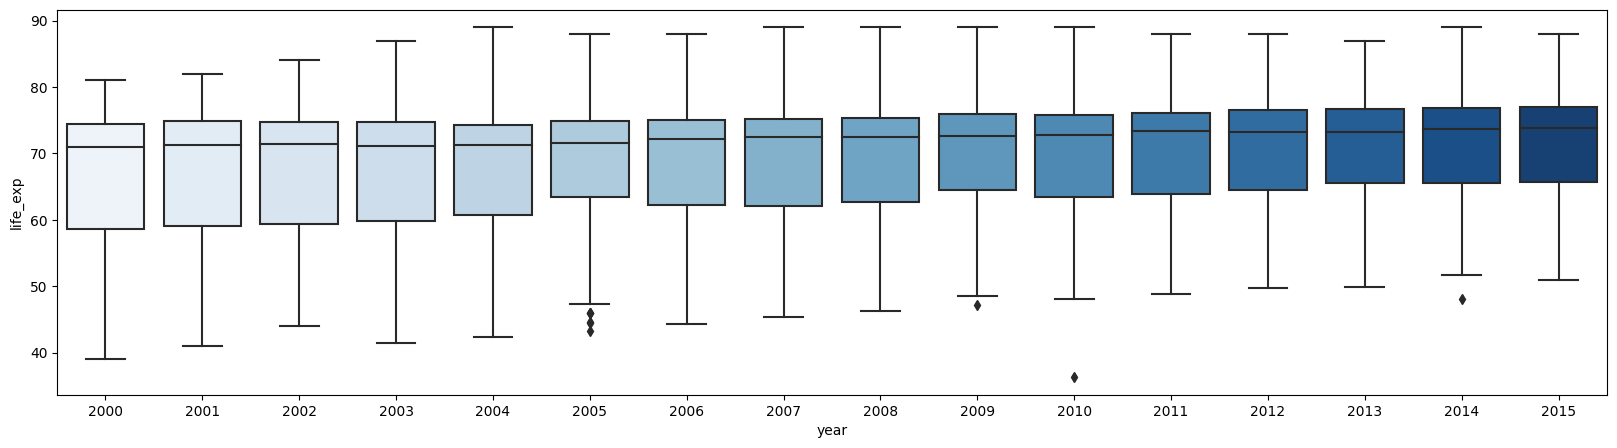

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = df_input_data.year, 
                y = df_input_data['life_exp'], 
                ax = ax,
                palette="Blues")

Die mittlere Lebenserwartung (Linie innerhalb der Box) ist von 2000-2015 stets gestiegen. Bei der minimalen Lebenserwartung gibt es aber grössere Schwankungen. Beispielsweise ist sie von 2002 auf 2003 plötzlich wieder gesunken. Dies könnte aber auch daher kommen, dass für ein Land die Messung erst ab 2003 durchgeführt wurde.

### Bi-/Multivariat

#### Korrelationsmatrix

Die Zahlen zeigen die Korrelation zwischen zwei Variablen. Ein Wert von 0 bedeutet, dass kein Zusammenhang besteht, währenddessen 1 und -1 ein perfekter positiver bzw. negativer linearer Zusammenhang beschreibt. Da immer zwei Variablen miteinander verglichen werden, ist die Diagonale (Variable mit sich selber) immer 1 und der Rest ist an dieser Diagonale gespiegelt (Abhängigkeit von Variablen A und B ist gleich wie von Variablen B und A).

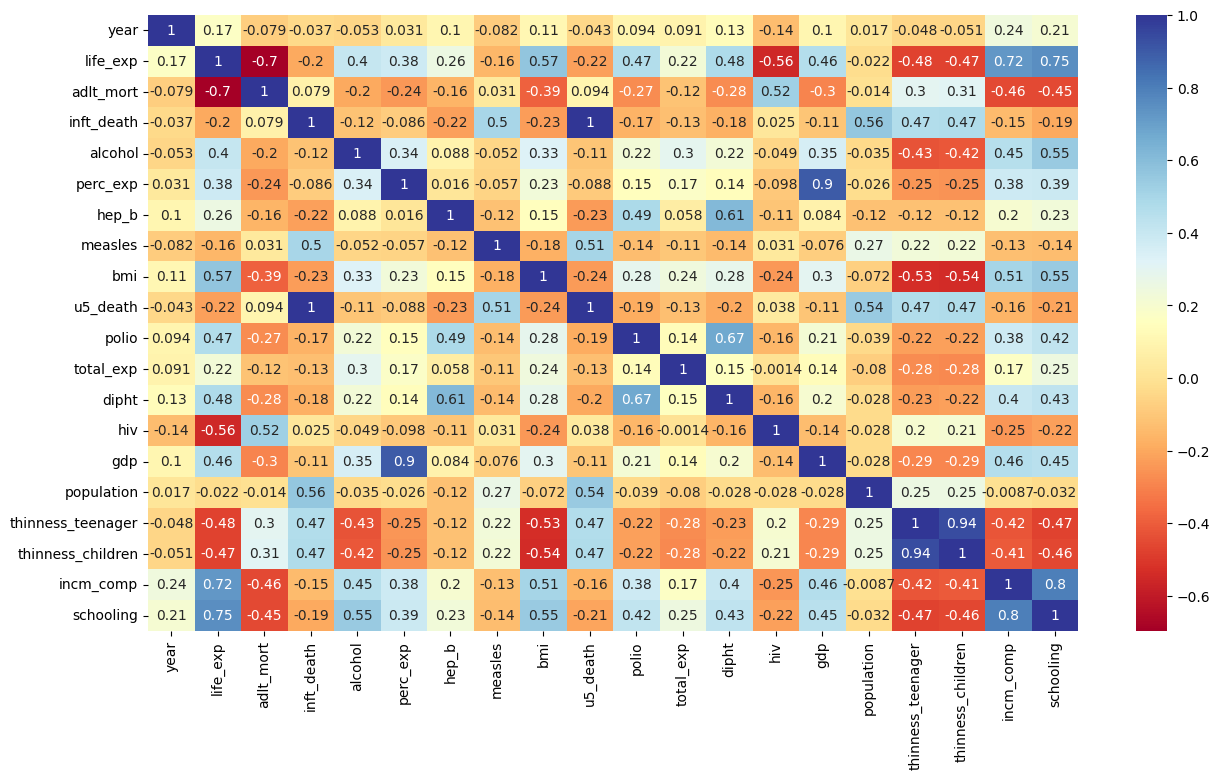

In [10]:
plt.subplots(figsize=(15,8))
sns.heatmap(df_input_data.corr(numeric_only = True), annot=True, cmap="RdYlBu")
plt.show()

Folgende Erkennntnisse lassen sich aus der Heatmap herauslesen:
*  Jede Variable ist mit sich selbst perfekt positiv linear korreliert (nicht sehr überraschend)
*  Die Kindersterblichkeit ist mit der Anzahl Toten unter 5 Jahren perfekt positiv linear korreliert (nicht sehr überraschend)
*  Es gibt einen starken positiven linearen Zusammenhang zwischen Untergewicht bei Kindern und Untergewicht bei Jugendlichen (nicht sehr überraschend)
* Es gibt einen sehr starken positiven linearen Zusammenhang zwischen dem BIP und dem Anteil der Gesundheitsausgaben am BIP (nicht sehr überraschend)
* Es gibt einen sehr starken positiven linearen Zusammenhang zwischen Entwicklung und Bildung (nicht sehr überraschend)
* Es gibt ein paar moderate positive lineare Zusammenhänge, z.B. zwischen:
   - Polio und Diphtherie
   - Hepatitis B und Diphtherie
   - BMI und Lebenserwartung
   - BIP und Lebenserwartung
   - Masern und Kindersterblichkeit
   - Bildung/Entwicklung und Lebenserwartung
* Es gibt einen starken negativen linearen Zusammenhang zwischen der Erwachsenensterblichkeit und der Lebenserwartung (nicht sehr überraschend)
* Es gibt ein paar moderate negative lineare Zusammenhänge, z.B. zwischen:
   - Untergewicht bei Jugendlichen/Kindern und BMI
   - Untergewicht bei Jugendlichen/Kindern und Lebenserwartung
   - Untergewicht bei Jugendlichen/Kindern und Bildung/Entwicklung
   - HIV und Lebenserwartung

#### Pairplot

Mit einem Pairplot kann man wie in der Heatmap jede Kombination von Variablen gegenseitig prüfen. Diesmal wird das Resultat aber grafisch dargestellt. Es sind dieselben Schlussfolgerungen herauszulesen, wie oben beschrieben.

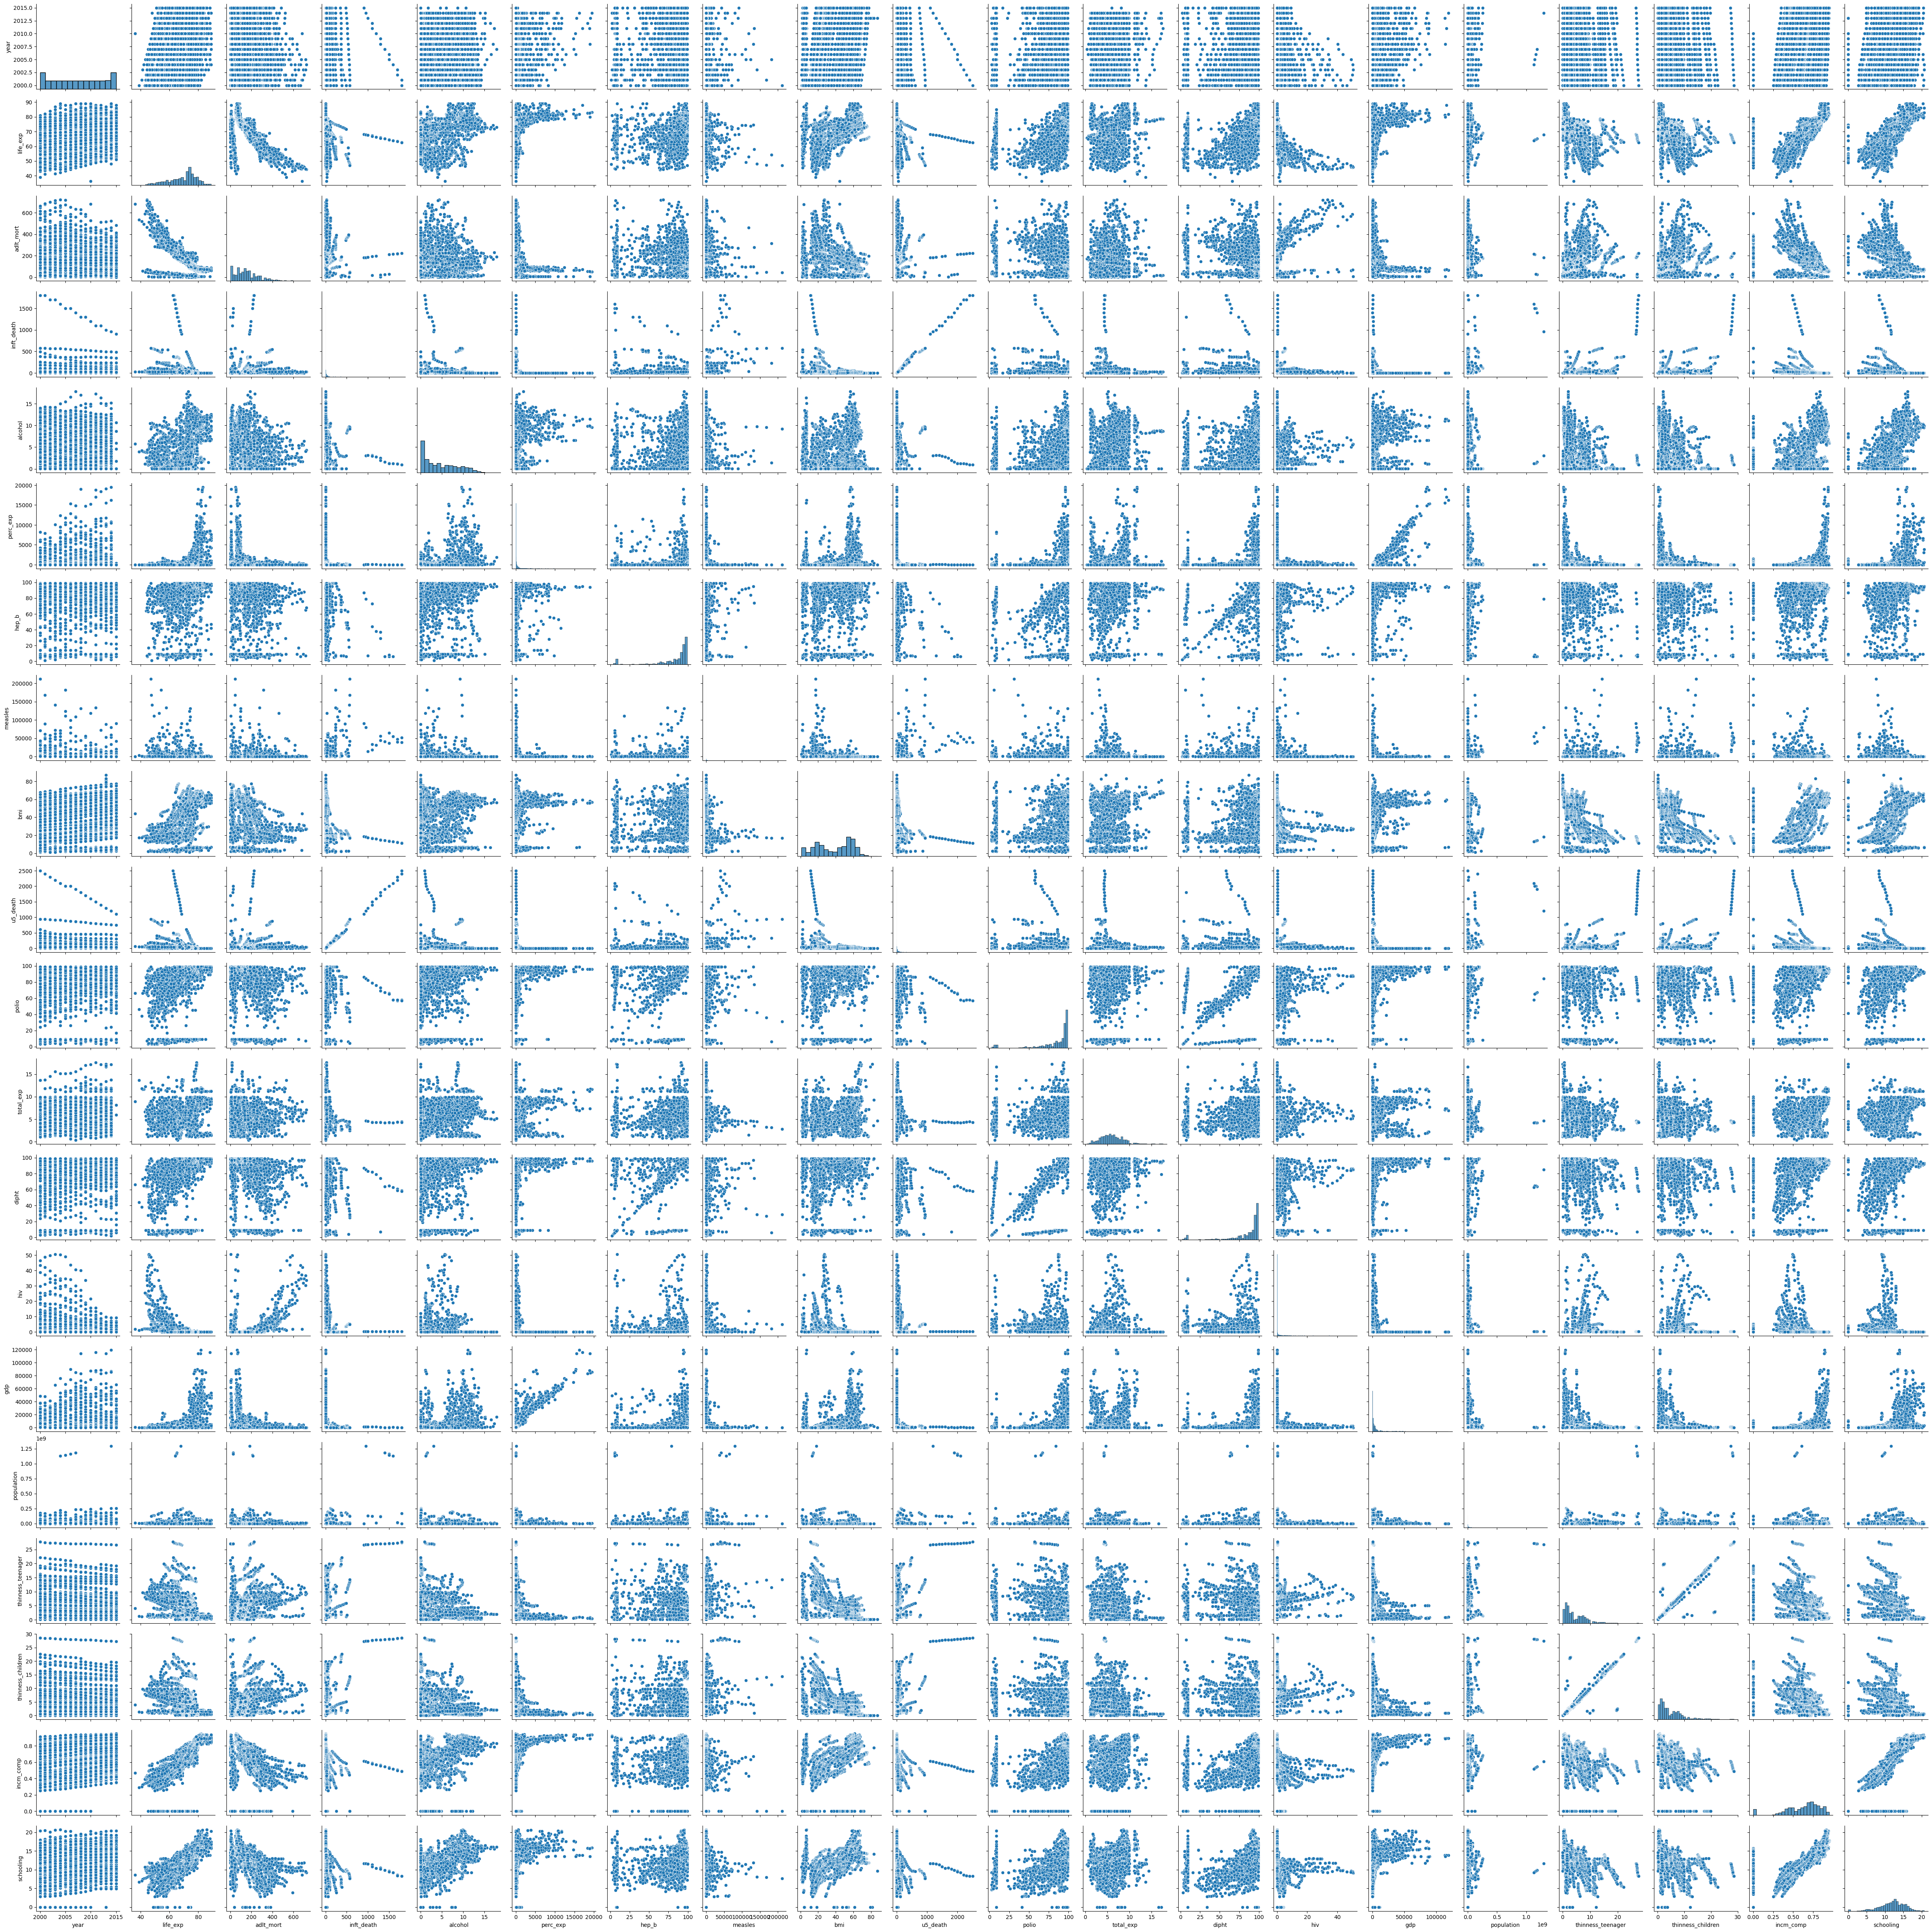

In [11]:
# seaborn pairplot
sns.pairplot(df_input_data)
# to show
plt.show()

Der Zusammenhang zwischen dem BIP und dem Anteil der Gesundheitsausgaben am BIP kann auch isoliert betrachtet werden:

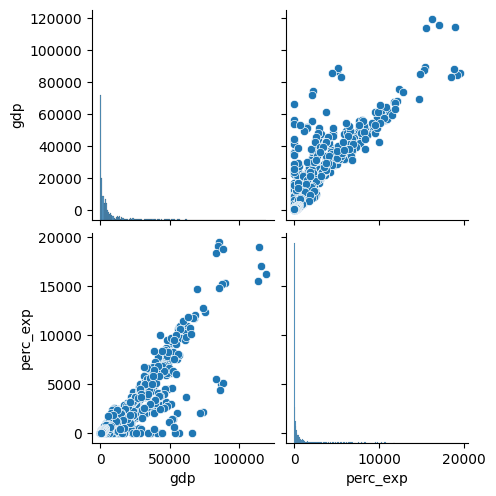

In [12]:
# seaborn pairplot
sns.pairplot(df_input_data[['gdp','perc_exp']])
# to show
plt.show()

## Regressionsanalyse

### Multiple Lineare Regression

Die multiple lineare Regression ist eine Methode, um die Werte einer abhängigen Variablen (hier die Lebenserwartung) anhand mehrerer unabhängiger Werte (z.B. sozioökonomische Faktoren, Prävalenzen, etc.) vorherzusagen.

#### Modelldefinition

In [13]:
x = df_input_data[['population',
                   'gdp',
                   'bmi',
                   'polio',
                   'dipht',
                   'hiv',
                   'alcohol',
                   'measles',
                   'hep_b',
                   'inft_death',
                   'adlt_mort',
                   'thinness_teenager',
                   'thinness_children',
                   'total_exp']]
y = df_input_data['life_exp']
 
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x, missing='drop').fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     344.3
Date:                Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:11:30   Log-Likelihood:                -4792.4
No. Observations:                1649   AIC:                             9615.
Df Residuals:                    1634   BIC:                             9696.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                64.1298      0.71

Die multiple lineare Regression zeigt ein Bestimmtheitsmass (R^2) von 0.747. Das bedeutet, dass 74.7% der Variabilität der abhängigen Variable durch das lineare Modell erklärt werden kann. Die Konstante (engl. Intercept) des Modelles ist 64.13. Die Koeffizienten für die weiteren Variablen geben den Multiplikator in der Gleichung der linearen Regression an. Das Modell lässt sich also mit der folgenden Gleichung beschreiben:
  
***life_exp** = 6.11e-09 * **population** + 0.0001 * **gdp** + 0.0863 * **bmi** + 0.0241 * **polio** + 0.0406 * **dipht** - 0.4536 * **hiv** + 0.2586 * **alcohol** + 1.323e-05 * **measles** - 0.0066 * **hep_b** - 0.0047 * **inft_death** - 0.0245 * **adlt_mort** - 0.1715 * **thinness_teenager** + 0.0520 * **thinness_children** + 0.1230 * **total_exp** + 64.1298*
  
Die p-Werte der einzelnen unabhängigen Variablen beschreiben die Signifikanz. Gehen wir von einem Signifikanzniveau von 0.05 aus, sind also alle Variablen signifikant mit Ausnahme von "measles", "hep_b" und "thinness_children" (grösser als 0.05).


#### Residuenanalyse

Damit die lineare Regression Sinn macht, sollten die Residuen normalverteilt sein. Residuen sind die Differenzen zwischen den tatsächlichen beobachteten Werten und den von einem Modell vorhergesagten Werten.

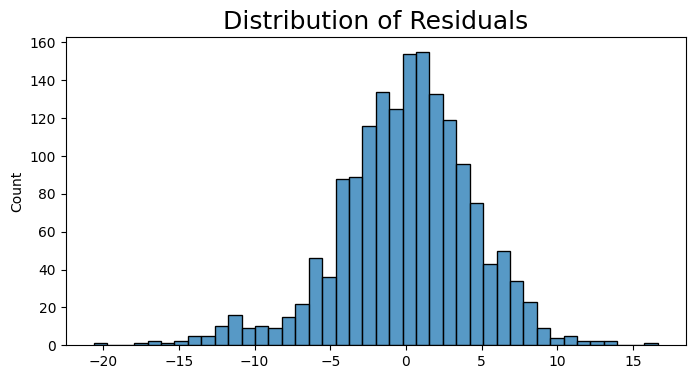

In [14]:
residuals = model.resid

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.histplot(residuals)
plt.show()

Die Residuen sind schön in der Gauss'schen Glockenkurve verteilt und somit normalverteilt. Wenn die Residuen nicht normalverteilt wären, kann dies darauf hindeuten, dass das Modell nicht die tatsächliche Datenstruktur abbildet, und die statistischen Verfahren könnten unzuverlässig sein. Das ist hier nicht der Fall.

#### QQ-Plot

Zur Sicherheit machen wir noch einen QQ-Plot der Residuen.

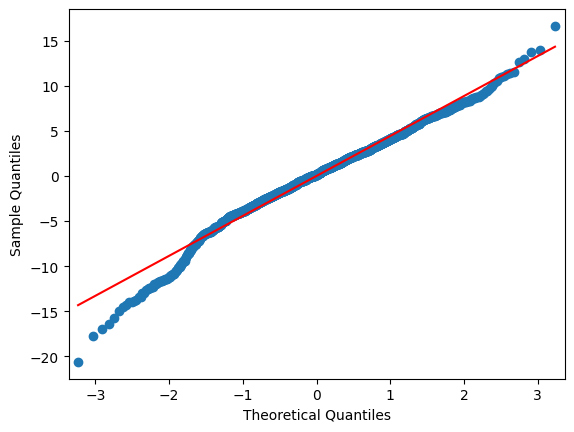

In [15]:
# Create a QQ plot for the residuals
qqplot(residuals, line='s')

# Display the plot
plt.show()

Der QQ-Plot vergleicht die Residuen mit den Quantilen der theoretischen Normalverteilung. Wenn die Residuen normalverteilt sind, sollten die Punkte wie im Diagramm oben ersichtlich im QQ-Plot entlang einer diagonalen Linie liegen. Das bedeutet, dass die Residuen mit den erwarteten Quantilen der Normalverteilung übereinstimmen. Das Modell multiple lineare Modell erklärt also die Daten gut und die Annahme der Normalverteilung für die Residuen ist gerechtfertigt.

### Logistische Regression

Eine logistische Regression ist ein statistisches Verfahren, um die Wahrscheinlichkeit eines Ereignisses vorherzusagen. Es wird eingesetzt, um binäre (ja/nein bzw. 0/1) Ergebnisse vorherzusagen. 
  
Die logistische Regression verwendet eine logistische Funktion, um die Wahrscheinlichkeit des Ereignisses in Abhängigkeit von den unabhängigen Variablen zu modellieren. Das Ergebnis der logistischen Regression ist also ein Modell, das anzeigt, wie stark jede unabhängige Variable mit der Wahrscheinlichkeit des Ereignisses zusammenhängt.
  
Um eine logistische Regression hier anwenden zu können, muss die abhängige Variable also erst transformiert werden, sodass diese aus 0 und 1 Werte besteht. Dazu kann man z.B. eine neue Spalte defineiren, die angibt, ob die Lebenserwartung grösser oder gleich 65 Jahre ist. Falls ja, wird eine 1 codiert, falls nein, wird eine 0 codiert.

In [16]:
# Copy the input data set
df_input_data_log = df_input_data.copy()

# Calculate a life_exp column with 0 or 1 value for a logistic regression
df_input_data_log["life_exp_65_or_higher"] = (df_input_data_log["life_exp"] >= 65).astype(int)

# Define the predictor variables (features)
X = df_input_data_log[['population',
                   'gdp',
                   'bmi',
                   'polio',
                   'dipht',
                   'hiv',
                   'alcohol',
                   'measles',
                   'hep_b',
                   'inft_death',
                   'adlt_mort',
                   'thinness_teenager',
                   'thinness_children',
                   'total_exp']]

# Add a constant term to the predictor variables to represent the intercept
X = sm.add_constant(X)

# Define the response variable (target)
y = df_input_data_log['life_exp_65_or_higher']

# Create and fit the logistic regression model
model = sm.Logit(y, X, missing = 'drop')
result = model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.178085
         Iterations 10
                             Logit Regression Results                            
Dep. Variable:     life_exp_65_or_higher   No. Observations:                 1649
Model:                             Logit   Df Residuals:                     1634
Method:                              MLE   Df Model:                           14
Date:                   Sat, 17 Jun 2023   Pseudo R-squ.:                  0.6927
Time:                           23:11:31   Log-Likelihood:                -293.66
converged:                          True   LL-Null:                       -955.54
Covariance Type:               nonrobust   LLR p-value:                4.195e-274
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.8545      0.647      1.320      0.187      -0

Die Konstante ist in diesem Fall 0.8545. Mit einem Signifikanzniveau von 0.05 sind also ausschliesslich die Variablen gdp, bmi, hiv, alcohol und adlt_mort signifikant (< 0.05).
  
Das Pseudo-Bestimmtheitsmass beträgt 69.27%. Das bedeutet, dass 69.27% der Variabilität der abhängigen Variable durch das logistische Modell erklärt werden kann.

## Principal Component Analysis

Mit der PCA ("Principal Component Analysis" oder auch Hauptkomponentenanalyse) versucht man in den Daten eine Dimensionsreduktion zu machen. Dabei werden einzelne Variablen zusammen genommen zu einer neuen Variable, die möglichst eine maximale Varianz in den Daten erklären.

In [48]:
# Copy the input data set
df_input_data_pca = df_input_data.copy()

# drop non numeric columns
df_input_data_pca = df_input_data_pca.drop('country', axis=1)
df_input_data_pca = df_input_data_pca.drop('status', axis=1)

# drop naN values
df_input_data_pca.dropna(inplace=True)

Nun skalieren wir alle numerischen Spalten mit dem StandardScaler.

In [49]:
# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_input_data_pca)

Wir versuchen eine Hauptkomponentenanalyse mit 2 Komponenten.

In [50]:
# Keep 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

Nun kann das Resultat analysiert werden.

In [51]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.3067837  0.14494487]


Die "explained variance ratio" gibt den Anteil, den der Faktor an der Gesamtvarianz der beobachteten Variablen erklärt. Das bedeutet, dass mit diesem Resultatvektor [0.3067837  0.14494487] 30.68% der Varianz durch Komponente 1 erklärt ist und 14.50 durch Komponente 2.

## Hypothesentests

### Fragestellung: Sind die Bruttoinlandprodukte (BIP) über die verschiedenen Länder normalverteilt?

Um die Frage zu beantworten, kann mit einem Shapiro-Wilk-Test auf Normalverteilung geprüft werden.
  
H0 (Nullhypothese): Die Bruttoinlandprodukte sind normalverteilt
  
H1 (Arbeitshypothese): Die Bruttoinlandprodukte sind nicht normalverteilt
  
Als Signifikanzniveau wählen wir 5%.

In [22]:
# Copy the input data set
df_hypo_data_log = df_input_data.copy()

# Shapiro-Wilk-Test to check if data is normally distributed
statistic, p_value = shapiro(df_hypo_data_log['gdp'])

Wenn der p-Wert kleiner oder gleich wie das Signifikanzniveau ist, wird die Nullhypothese verworfen.

In [23]:
# significance level
alpha = 0.05

if p_value > alpha:
    print("Die Nullhypothese (Daten sind normalverteilt) kann nicht verworfen werden.")
else:
    print("Die Nullhypothese (Daten sind normalverteilt) wird verworfen.")

Die Nullhypothese (Daten sind normalverteilt) kann nicht verworfen werden.


In [24]:
p_value

1.0

Der p-Wert beträgt 1.0, was hier bedeutet, dass die Nullhypothese nicht verworfen werden kann und die Daten somit mit einer Wahrscheinlichkeit von 95% normalverteilt sind. Ein so hoher Wert ist allerdings erstaunlich und es ist fachlich schwer vorstellbar, dass die Daten normalverteilt sein können. Am Besten visualisieren wir mal das Datenset.

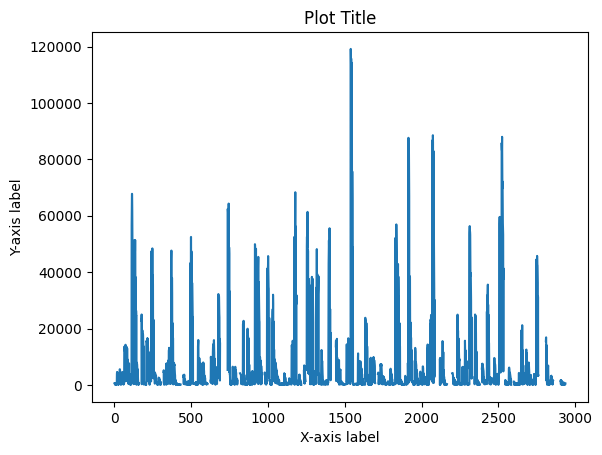

In [25]:
plt.plot(df_hypo_data_log['gdp'])
plt.xlabel('X-axis label')  # Set the label for the x-axis
plt.ylabel('Y-axis label')  # Set the label for the y-axis
plt.title('Plot Title')     # Set the title of the plot
plt.show()

Auf einen Blick sieht man, dass die Daten keiner schönen Normalverteilung (Glockenkurve) folgen. Ein gutes Beispiel dafür, dass man sich in der Statistik nie auf einen einzelnen Test verlassen sollte. Am Besten prüfen wir die Normalverteilung noch mit einem anderen Test.

### Einstichprobenverfahren

Die Fragestellung von vorhin können wir nun mit einem Einstichprobenverfahren versuchen zu beantworten. Es soll ein Kolmogorow-Smirnow-Test durchgeführt werden.

In [26]:
# Copy the input data set
df_hypo_data_log = df_input_data.copy()

# remove na values
df_hypo_data_log['gdp'].dropna()

# Nullhypothesis: The gdp data is normally distributed
null_distribution = 'norm'

# Kolmogorow-Smirnow-Test
statistic, p_value = kstest(df_hypo_data_log['gdp'], null_distribution)

# significance level
alpha = 0.05
if p_value > alpha:
    print("Die Nullhypothese (Daten sind normalverteilt) kann nicht verworfen werden.")
else:
    print("Die Nullhypothese (Daten sind normalverteilt) wird verworfen.")

Die Nullhypothese (Daten sind normalverteilt) wird verworfen.


Die Bruttoinlandprodukt-Daten sind also *nicht* normalverteilt. Der p-Wert ist kleiner als das Signifikanzniveau.

## Zeitreihenanalyse

Leider ist das Datenset nicht wirklich geeignet für eine Zeitreihenanalyse. Es gibt einfach zu wenige Messwerte für ein einzelnes Land. Um die Methodik trotzdem durchspielen zu können, soll an dieser Stelle aber einfach auf die Werte der Schweiz gefiltert werden.

In [27]:
# Copy the input data set
df_input_data_ts = df_input_data.copy()

# Filter for Switzerland's values
df_input_data_ts = df_input_data_ts.query("country == 'Switzerland'")

df_input_data_ts

country  year     status  life_exp  adlt_mort  inft_death  alcohol  \
2521  Switzerland  2015  Developed      83.4       49.0           0      NaN   
2522  Switzerland  2014  Developed      83.2       51.0           0     9.61   
2523  Switzerland  2013  Developed      83.0       52.0           0     9.73   
2524  Switzerland  2012  Developed      82.7       54.0           0     9.86   
2525  Switzerland  2011  Developed      82.6       55.0           0     9.99   
2526  Switzerland  2010  Developed      82.3       57.0           0    10.01   
2527  Switzerland  2009  Developed      82.1        6.0           0    10.15   
2528  Switzerland  2008  Developed      82.0        6.0           0    10.29   
2529  Switzerland  2007  Developed      81.7       63.0           0    10.44   
2530  Switzerland  2006  Developed      81.5       65.0           0    10.24   
2531  Switzerland  2005  Developed      81.1       66.0           0    10.15   
2532  Switzerland  2004  Developed      81.0       69.0           0    10.55   
2533  Switzerland  2003  Developed      85.0       72.0           0    10.82   
2534  Switzerland  2002  Developed      84.0       74.0           0    10.85   
2535  Switzerland  2001  Developed      82.0       75.0           0    11.12   
2536  Switzerland  2000  Developed      79.7       78.0           0    11.26   

          perc_exp  hep_b  measles  ...  polio  total_exp  dipht  hiv  \
2521      0.000000    NaN       35  ...   97.0        NaN   97.0  0.1   
2522  19479.911610    NaN       23  ...   96.0      11.66   96.0  0.1   
2523  19099.045060    NaN      175  ...   96.0      11.71   96.0  0.1   
2524  18379.329740    NaN       61  ...   96.0      11.59   96.0  0.1   
2525  18822.867320    NaN      621  ...   96.0      11.21   96.0  0.1   
2526   2198.590865    NaN       77  ...   96.0      11.70   95.0  0.1   
2527  14714.825880    NaN      958  ...   96.0      11.00   95.0  0.1   
2528   2084.255535    NaN     2022  ...   96.0       1.29   95.0  0.1   
2529  11892.334290    NaN     1015  ...   94.0       1.21   94.0  0.1   
2530  10598.081870    NaN        0  ...   94.0       1.39   94.0  0.1   
2531  10055.349810    NaN       60  ...   94.0       1.86   94.0  0.1   
2532   9495.540576    NaN       39  ...   95.0       1.96   93.0  0.1   
2533    842.276809    NaN      574  ...   95.0       1.93   93.0  0.1   
2534   6853.628494    NaN        0  ...   95.0       1.61   93.0  0.1   
2535   6478.346135    NaN      700  ...   95.0       1.28   93.0  0.1   
2536   5834.582046    NaN        0  ...   95.0       9.91   93.0  0.1   

              gdp  population  thinness_teenager  thinness_children  \
2521   8989.84240   8282396.0                0.4                0.3   
2522  85814.58857   8188649.0                0.4                0.3   
2523  84658.88768    889346.0                0.4                0.3   
2524  83164.38795   7996861.0                0.5                0.3   
2525  87998.44468   7912398.0                0.5                0.3   
2526  74276.71842    782499.0                0.5                0.4   
2527  69672.47100   7743831.0                0.5                0.4   
2528  72119.56870   7647675.0                0.5                0.4   
2529  63223.46778   7551117.0                0.5                0.4   
2530  57348.92788   7483934.0                0.6                0.4   
2531  54797.54663   7437115.0                0.6                0.4   
2532  53255.97631   7389625.0                0.6                0.4   
2533   4796.56497     73391.0                0.6                0.5   
2534  41336.72192   7284753.0                0.6                0.5   
2535  38538.64447   7229854.0                0.7                0.5   
2536  37813.23426    718425.0                0.7                0.5   

      incm_comp  schooling  
2521      0.938       16.0  
2522      0.936       15.9  
2523      0.934       15.8  
2524      0.932       15.7  
2525      0.932       15.6  
2526      0.920       15.

Es ist also eine sehr bescheidene Zeitreihe mit nur 16 Zeilen (Jahr 2000-2015).

In [28]:
# Filter for relevant columns
df_input_data_ts = df_input_data_ts[['year','gdp']]

# Convert 'year' column to datetime format
df_input_data_ts['year'] = pd.to_datetime(df_input_data_ts['year'], format='%Y')

# Set 'year' column as the time index
df_input_data_ts.set_index('year', inplace=True)

# Sort the DataFrame based on the date index
df_input_data_ts = df_input_data_ts.sort_index()

df_input_data_ts

/var/folders/_s/gwlgn2gs5ts1bjthvw7gxlrr0000gn/T/ipykernel_42091/2926025171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_data_ts['year'] = pd.to_datetime(df_input_data_ts['year'], format='%Y')


gdp
year                   
2000-01-01  37813.23426
2001-01-01  38538.64447
2002-01-01  41336.72192
2003-01-01   4796.56497
2004-01-01  53255.97631
2005-01-01  54797.54663
2006-01-01  57348.92788
2007-01-01  63223.46778
2008-01-01  72119.56870
2009-01-01  69672.47100
2010-01-01  74276.71842
2011-01-01  87998.44468
2012-01-01  83164.38795
2013-01-01  84658.88768
2014-01-01  85814.58857
2015-01-01   8989.84240

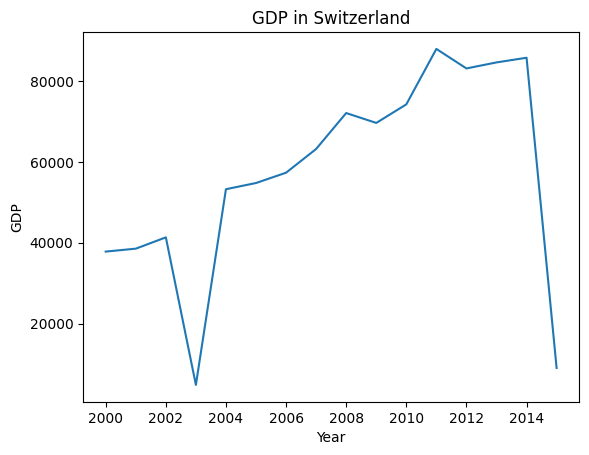

In [29]:
# Plot the GDP data
plt.plot(df_input_data_ts.index, df_input_data_ts['gdp'])
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP in Switzerland')
plt.show()

In [30]:
# Perform Augmented Dickey-Fuller test for stationarity
result = sm.tsa.stattools.adfuller(df_input_data_ts['gdp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.8383634292707938
p-value: 0.361588423100048


Der p-Wert ist signifikant höher als 0.05, was auf eine nicht-stationäre Zeitreihe hinweist. Wir wollen nun eine erste Differenzierung durchführen. Durch die Berechnung der Differenz werden die absoluten Werte der Zeitreihe entfernt und es bleiben nur noch die Veränderungen zwischen den Beobachtungen übrig. Dadurch kann man saisonale Muster oder Trends eliminieren.

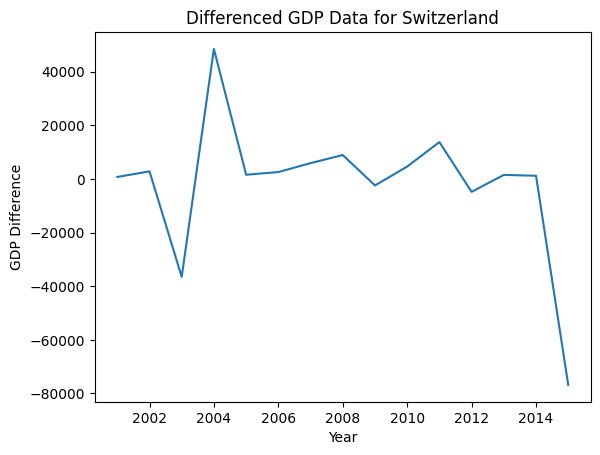

In [31]:
# Take the first difference of the GDP data
df_input_data_ts['gdp_diff'] = df_input_data_ts['gdp'].diff()
df_input_data_ts['gdp_diff'].dropna(inplace=True)

# Plot the differenced data
plt.plot(df_input_data_ts.index[:], df_input_data_ts['gdp_diff'])
plt.xlabel('Year')
plt.ylabel('GDP Difference')
plt.title('Differenced GDP Data for Switzerland')
plt.show()

Nun prüfen wir nochmals die Stationarität aber auf der ersten Differenzierung (Spalte gdp_diff).

In [32]:
# Perform Augmented Dickey-Fuller test for stationarity
df_input_data_ts.dropna(inplace=True)
result = sm.tsa.stattools.adfuller(df_input_data_ts['gdp_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.2856189953249832
p-value: 0.015533672227103848


Die Stationarität konnte durch die Differenzierung also erfolgreich sichergestellt werden. Der p-wert ist nun signifikant kleiner als 0.05.

Um später eine ARIMA "Autoregressive Integrated Moving Average" Vorhersage zu machen, wollen wir die optimalen Werte für p (wieviele vorhergehende Schritte sollen verwendet werden um den nächsten vorherzusagen), d (wie oft soll differenziert werden) und q (wieviele Fehlerinformationen sollen verwendet werden). Dazu kann man alle möglichen Kombinationen von p, d und q in einem gewissen Range testen um die optimale Konfiguration zu finden.

In [33]:
# Explicitly specify the frequency as 'A' for annual data
df_input_data_ts.index = pd.date_range(start=df_input_data_ts.index[0], periods=len(df_input_data_ts), freq='A')

# Define the range of values to search for p, d, and q
p_values = range(1, 3)  # Range for AR parameter
d_values = range(0, 2)  # Range for differencing parameter
q_values = range(0, 3)  # Range for MA parameter

best_aic = np.inf
best_order = None

# Iterate over all possible combinations of p, d, and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                # Fit the ARIMA model
                model = sm.tsa.ARIMA(df_input_data_ts['gdp_diff'], order=order)
                model_fit = model.fit()

                # Check if the current model has a lower AIC value
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = order
            except:
                continue

# Print the best order
print("Best (p, d, q):", best_order)

Best (p, d, q): (2, 1, 0)


/Users/pathir/Desktop/FFHS - Data Science/3 - CAS Statistische Datenanalyse/StatDa/Semesterarbeit/statda_py/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/pathir/Desktop/FFHS - Data Science/3 - CAS Statistische Datenanalyse/StatDa/Semesterarbeit/statda_py/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/pathir/Desktop/FFHS - Data Science/3 - CAS Statistische Datenanalyse/StatDa/Semesterarbeit/statda_py/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressi

Nun nutzen wir die oben ermittelte Optimalkonfiguration von p, d und q (2,1,0), um das ARIMA Modell zu fitten.

In [34]:
# Determine the optimal p, d, and q values using grid search or other methods
p = 2
d = 1
q = 0

# Create and fit the ARIMA model
model = sm.tsa.ARIMA(df_input_data_ts['gdp_diff'], order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               gdp_diff   No. Observations:                   15
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -162.868
Date:                Sat, 17 Jun 2023   AIC                            331.737
Time:                        23:11:37   BIC                            333.654
Sample:                    12-31-2001   HQIC                           331.559
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0198      0.331     -3.083      0.002      -1.668      -0.371
ar.L2         -0.5289      0.562     -0.941      0.347      -1.631       0.573
sigma2      7.329e+08   8.31e-10   8.82e+17      0.0

Wenn wir mit dem Modell nun die nächsten 10 Jahre vorhersagen wollen, sieht das folgendermassen aus:

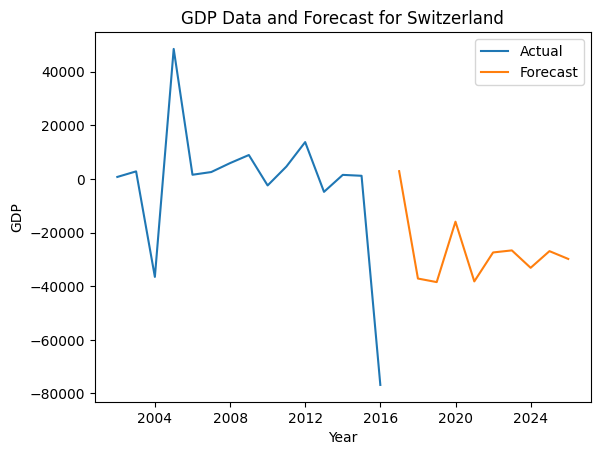

In [35]:
# Forecast future values
forecast = model_fit.forecast(steps=10)

# Plot the original data and the forecasted values
plt.plot(df_input_data_ts.index, df_input_data_ts['gdp_diff'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Data and Forecast for Switzerland')
plt.legend()
plt.show()

In blau sind die effektiven Werte aus dem Datenset abgebildet, in gelb die vorhergesagten darauffolgenden 10 Jahre. Da dies ein altes Datenset ist und die effektiven Werte für die Jahre nach 2015 sogar auffindbar wären im Internet, könnte man diese nun mit der Vorhersage verglichen werden. Auf diesen Aufwand wird an dieser Stelle aber verzichtet. Es ging hier vor Allem um die Methodik der Zeitreihenanalyse.